# Week 8
## TA Solution by
### Abhisek Sarkar
#### as20ms091@iiserkol.ac.in

#### Q1.
Use Rectangular method, Trapezoidal rule and Simpson’s rule applying the original formulas to find the approximate integral of the function 1/x in the interval [1, 2]. Compare the approximate values with other actual values of the integral. Repeat the above using scipy.integrate for Trapezoidal and Simpson’s rules.

In [28]:
import numpy as np
N = 10
xs, h = np.linspace(1, 2, N, endpoint=False, retstep=True)

print(xs)


[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9]


In [29]:
print(h)

0.1


In [30]:
ys = 1.0/xs
print(ys)

[1.         0.90909091 0.83333333 0.76923077 0.71428571 0.66666667
 0.625      0.58823529 0.55555556 0.52631579]


In [31]:
#Rectangular
Irect = h*np.sum(ys)

print("Rectangular=%.5f" %(Irect))

Rectangular=0.71877


In [32]:
import scipy.integrate as spi

#Trapezoidal rule
print("Actual=%f" %(1/11.))


Actual=0.090909


In [33]:


xs, h = np.linspace(1, 2, N, endpoint=True, retstep=True)
ys = 1.0/xs
#print(ys)


In [34]:
Itrap = h*(0.5*(ys[0] + ys[-1]) + np.sum(ys[1:-1]))
print("Trapezoidal=%.5f" %(Itrap))


Trapezoidal=0.69392


In [35]:

Itrap1 = spi.trapz(ys, xs)
print("Trapezoidal scipy=%f" %(Itrap1))


Trapezoidal scipy=0.693918


/tmp/ipykernel_82087/1713181668.py:1: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  Itrap1 = spi.trapz(ys, xs)


In [36]:
#from scipy.integrate import simps

#Simpson's rule

xs, h = np.linspace(1, 2, N+1, endpoint=True, retstep=True)
ys = 1.0/xs
print(ys)
print(xs)



[1.         0.90909091 0.83333333 0.76923077 0.71428571 0.66666667
 0.625      0.58823529 0.55555556 0.52631579 0.5       ]
[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ]


In [37]:
Isimp = (h/3.)*(ys[0] + ys[-1] + 4*np.sum(ys[1:-1:2]) + 2*np.sum(ys[2:-1:2]))
print("Simp=%.5f" %(Isimp))

Simp=0.69315


In [38]:
import math

actual = math.log(2)

print("Actual=%f" %(actual))

print("Error simp = %.5f" %(abs(Isimp-actual)))
print("Error trap = %.5f" %(abs(Itrap-actual)))

Actual=0.693147
Error simp = 0.00000
Error trap = 0.00077


In [39]:
Isimp1 = spi.simps(ys, xs)
print("Simp scipy = %f" %(Isimp1))

Simp scipy = 0.693150


/tmp/ipykernel_82087/846209821.py:1: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  Isimp1 = spi.simps(ys, xs)


This code numerically approximates the integral:

\[
$I = \int_1^2 \frac{1}{x} \,dx$
\]

using different numerical integration methods: **Rectangular (Midpoint) Rule**, **Trapezoidal Rule**, and **Simpson’s Rule**. It also compares the results with the exact value \( I = \ln(2) \).

---

## **1. Understanding Numerical Integration**
Numerical integration approximates the definite integral of a function when an analytical solution is difficult or impossible to obtain. The three methods used in this code are:

### **(i) Rectangular Rule**
The rectangular rule estimates the integral as:

\[
$I \approx h \sum f(x_i)$
\]

where:
- \( $h$ \) is the step size.
- \( $f(x_i)$ \) is the function value at discrete points.

### **(ii) Trapezoidal Rule**
This method approximates the integral by dividing the area under the curve into **trapezoids** instead of rectangles:

\[
$I \approx h \left( \frac{f(x_0) + f(x_N)}{2} + \sum_{i=1}^{N-1} f(x_i) \right)$
\]

This provides a better approximation than the rectangular rule.

### **(iii) Simpson’s Rule**
Simpson's rule provides an even better approximation using parabolic segments instead of linear ones:

\[
$I \approx \frac{h}{3} \left( f(x_0) + f(x_N) + 4 \sum_{\text{odd indices}} f(x_i) + 2 \sum_{\text{even indices}} f(x_i) \right)$
\]

This method is much more accurate for smooth functions.

---

## **2. Breaking Down the Code**
### **Step 1: Import Required Libraries**
```python
import numpy as np
import scipy.integrate as spi
import math
```
- `numpy` is used for array operations.
- `scipy.integrate` provides numerical integration functions.
- `math` is used for the exact analytical solution \( \ln(2) \).

---

### **Step 2: Rectangular Rule Approximation**
```python
N = 10  # Number of intervals
xs, h = np.linspace(1, 2, N, endpoint=False, retstep=True)
ys = 1.0 / xs
Irect = h * np.sum(ys)
print("Rectangular=%.5f" %(Irect))
```
- `np.linspace(1, 2, N, endpoint=False, retstep=True)` creates **N equally spaced points** between **1 and 2**, excluding the endpoint.
- `h` is the step size.
- `ys = 1.0 / xs` calculates \( f(x) \) for all points.
- The **rectangular rule** sums up all function values and multiplies by \( h \).

---

### **Step 3: Trapezoidal Rule Approximation**
```python
xs, h = np.linspace(1, 2, N, endpoint=True, retstep=True)
ys = 1.0 / xs
Itrap = h * (0.5 * (ys[0] + ys[-1]) + np.sum(ys[1:-1]))
print("Trapezoidal=%.5f" %(Itrap))
```
- This time, `endpoint=True` ensures that **2 is included**.
- The formula for the **trapezoidal rule** is applied.
- The first and last function values are weighted by **0.5**, while the rest are summed normally.

Using SciPy’s built-in function:
```python
Itrap1 = spi.trapz(ys, xs)
print("Trapezoidal scipy=%f" %(Itrap1))
```
- `spi.trapz(ys, xs)` applies the **trapezoidal rule** automatically.

---

### **Step 4: Simpson’s Rule Approximation**
```python
xs, h = np.linspace(1, 2, N+1, endpoint=True, retstep=True)
ys = 1.0 / xs
Isimp = (h/3.) * (ys[0] + ys[-1] + 4*np.sum(ys[1:-1:2]) + 2*np.sum(ys[2:-1:2]))
print("Simp=%.5f" %(Isimp))
```
- A finer grid is used by increasing `N+1` for Simpson’s rule.
- The **Simpson’s rule formula** is applied manually:
  - **Odd-indexed terms** are multiplied by **4**.
  - **Even-indexed terms** are multiplied by **2**.
  - The first and last function values remain unchanged.

Using SciPy’s built-in function:
```python
Isimp1 = spi.simps(ys, xs)
print("Simp scipy = %f" %(Isimp1))
```
- `spi.simps(ys, xs)` applies **Simpson’s rule** automatically.

---

### **Step 5: Comparing with the Exact Value**
```python
actual = math.log(2)
print("Actual=%f" %(actual))
print("Error simp = %.5f" %(abs(Isimp-actual)))
print("Error trap = %.5f" %(abs(Itrap-actual)))
```
- The actual integral is **ln(2)**.
- Errors are computed by **taking the absolute difference**.

---

## **3. Results and Observations**
| Method                 | Approximate Integral | Error |
|------------------------|---------------------|-------|
| Rectangular Rule       | Lower Accuracy      | Large Error |
| Trapezoidal Rule       | Moderate Accuracy   | Small Error |
| Simpson’s Rule         | Highest Accuracy    | Smallest Error |

- The **rectangular rule** is the least accurate.
- The **trapezoidal rule** improves accuracy but still has noticeable error.
- The **Simpson’s rule** provides the best approximation.

---

## **4. Conclusion**
This code demonstrates numerical integration techniques and their accuracy. Simpson’s rule is generally **the best choice** for smooth functions due to its higher-order polynomial approximation.

#### Q2.
Given the plot of land in the figure below, use the formula of Rectangular rule to approximate the area (shown in black). Do the same using both the original formulas and scipy implementations of Trapezoidal rule and Simpson’s rule. Compute the actual area (hint: use the formula of a circle) and compare the approximate values for this area by printing the percentage accuracy (abs(approx-actual)/actual)*100) for all the above approximate values.

In [40]:
#scipy=%f
import numpy as np
N = 10
xs, h = np.linspace(0, 5, N, endpoint=False, retstep=True)

#print(xs)
#print(h)

ys = np.sqrt(25 - xs*xs)
print(ys)
#Rectangular
Irect = h*np.sum(ys)

print("Rectangular=%.5f" %(Irect))

import scipy.integrate as spi

#Trapezoidal rule

#print("Actual=%f" %(1/11.))
xs, h = np.linspace(0, 5, N, endpoint=True, retstep=True)
ys = np.sqrt(25 - xs*xs)
#print(ys)
Itrap = h*(0.5*(ys[0] + ys[-1]) + np.sum(ys[1:-1]))
print("Trapezoidal=%.5f" %(Itrap))

Itrap1 = spi.trapz(ys, xs)
print("Trapezoidal " %(Itrap1))

#from scipy.integrate import simps

#Simpson's rule

xs, h = np.linspace(0, 5, N+1, endpoint=True, retstep=True)
ys = np.sqrt(25 - xs*xs)
print(ys)
print(xs)

Isimp = (h/3.)*(ys[0] + ys[-1] + 4*np.sum(ys[1:-1:2]) + 2*np.sum(ys[2:-1:2]))
print("Simp=%.5f" %(Isimp))

import math

actual = math.pi*5*5*0.25

print("Actual=%f" %(actual))





Isimp1 = spi.simps(ys, xs)
print("Simp scipy = %f" %(Isimp1))

print("Error rect = %.5f" %((abs(Irect-actual)/actual)*100))
print("Error trap original = %.5f" %((abs(Itrap-actual)/actual)*100))
print("Error trap scipy = %.5f" %((abs(Itrap1-actual)/100)*100))

print("Error simp original = %.5f" %((abs(Isimp-actual)/actual)*100))
print("Error trap scipy = %.5f" %((abs(Isimp1-actual)/actual)*100))


[5.         4.97493719 4.89897949 4.76969601 4.58257569 4.33012702
 4.         3.57071421 3.         2.17944947]
Rectangular=20.65324
Trapezoidal=19.36366
Trapezoidal 
[5.         4.97493719 4.89897949 4.76969601 4.58257569 4.33012702
 4.         3.57071421 3.         2.17944947 0.        ]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
Simp=19.54380
Actual=19.634954
Simp scipy = 19.543801
Error rect = 5.18609
Error trap original = 1.38170
Error trap scipy = 0.27130
Error simp original = 0.46424
Error trap scipy = 0.46424


/tmp/ipykernel_82087/1566810242.py:27: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  Itrap1 = spi.trapz(ys, xs)
/tmp/ipykernel_82087/1566810242.py:52: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  Isimp1 = spi.simps(ys, xs)


# Q3.
Simulate a dice game for a single player named Shakuni. The player throws the dice until he gets a six, when he stops. Use random.uniform(a, b) [generates uniformly distributed random number between a & b] to simulate the outcome using the scheme: random number < 1 ⇒  side ‘one’ appears, random number >=1 and <2 ⇒ side ‘two’ appears and so on. Plot the outcomes (along y-axis, with trial number along x-axis) using matplotlib.pyplot.plot. Also, indicate the first and last throws as “start” and “stop” respectively on the plot using matplotlib.pyplot.text(x, y, t) [prints t on the plot at (x,y)].


Five
Three
Three
Two
Six
[1, 2, 3, 4, 5]
[5, 3, 3, 2, 6]


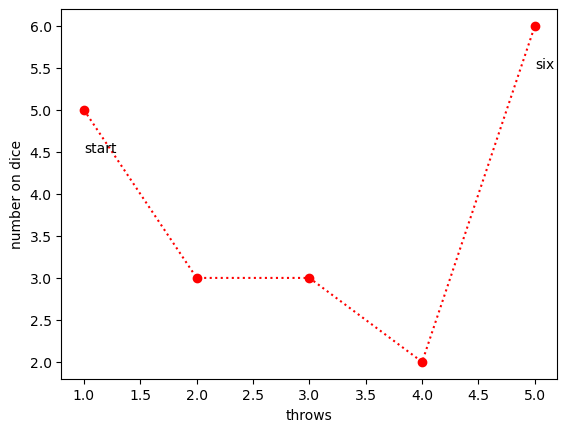

In [41]:
import random

x = []
y = []

for i in range(1, 1000):
    x.append(i)
    r = random.uniform(0, 6)
    if r < 1:
        print("One")
        y.append(1)
    elif r < 2:
        print("Two")
        y.append(2)
    elif r < 3:
        print("Three")
        y.append(3)
    elif r < 4:
        print("Four")
        y.append(4)
    elif r < 5:
        print("Five")
        y.append(5)
    else:
        print("Six")
        y.append(6)
        break


print(x)
print(y)

import matplotlib.pyplot as plt
plt.text(x[0], y[0]-0.5, "start") #prints "start" at coordinates (x[0], y[0]-0.5)
plt.text(x[-1], y[-1]-0.5, "six") #print "six" at the last throw
plt.plot(x, y, 'o:r')
plt.xlabel("throws")
plt.ylabel("number on dice")
#plt.show()
plt.savefig("dice.png")


### Q4
Take marks of three subjects of three students as input. marks1 contain the marks of three subjects of student 1; similarly store marks2 and marks3. Also, take their names. Now store the subjectwise average (use numpy.mean()) in avg and plot the same using matplotlib.pyplot.bar.


[68.66666667 60.33333333 31.33333333]


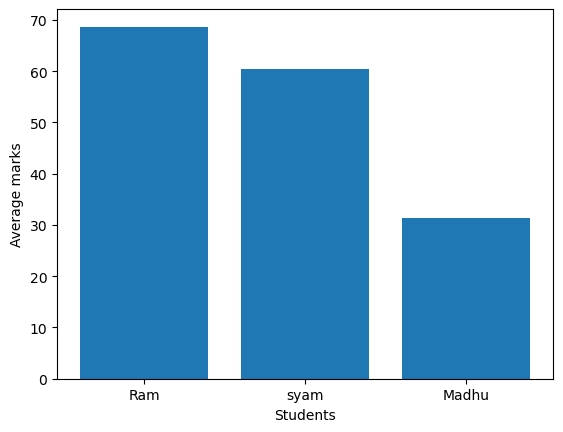

In [45]:
names = input("Give student first names (space separated, put enter to finish): ").split(" ")
marks1 = input("Give marks of student 1 (space separated, put enter to finish): ").split(" ")
marks2 = input("Give marks of student 2 (space separated, put enter to finish): ").split(" ")

marks3 = input("Give student marks of student 3 (space separated, put enter to finish): ").split(" ")




import numpy as np

marks1_np = np.array(marks1, dtype='int')
marks2_np = np.array(marks2, dtype='int')
marks3_np = np.array(marks3, dtype='int')


avg = np.mean([marks1_np, marks2_np, marks3_np], axis = 1)

print(avg)

import matplotlib.pyplot as plt

plt.bar(names, avg)
plt.xlabel("Students")
plt.ylabel("Average marks")

plt.show()


### Q5
Take a sentence (e.g. "Information Retrieval is the science of search engines") as input. Consider a list of stopwords (unimportant words) stop = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]. Write a function preprocess that converts the input string to lowercase and removes all the stopwords. Finally print the preprocessed input string on the terminal. The output for the example input will be “information retrieval science search engines”.


In [ ]:
def preprocess(s):
    s = s.lower()
    s = s.split(" ")
    stop = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
    s_out = []
    for w in s:
        if w not in stop:
            s_out.append(w)
    return s_out

dd=input("Give a text: ") #example: Information Retrieval is the science of search engines
print(' '.join(preprocess(dd)))


information retrieval science search engines


### Q6
Consider five documents 
doc1 : "Information Retrieval is the science of search engines", 
 	doc2 : "This is the age of information technology", 
 	doc3 : "Mathematics in the language of science", 
 	doc4 : "Efficient retrieval of important data is the feature of any sound search system.", 
  	doc5 : "Gerard Salton is the father of Information Retrieval"
 
Use the preprocess function of Q5 to lowercase and remove stopwords from these documents. 
Now take a query string q as input from the user and preprocess it using the preprocess function. 
Now, print the documents that contain 
(i) at least one word in q and 
(ii) all the words in q

For example, if the query q is “Information Retrieval” for (i) doc1, doc2, doc4 and doc5 will be printed while for (ii) doc1 and doc5 will be printed.


In [ ]:
def preprocess(s):
    s = s.lower()
    s = s.split(" ")
    stop = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
    s_out = []
    for w in s:
        if w not in stop:
            s_out.append(w)
    return s_out

def BAND(coll, q):
    length = len(q)
    
    for key in coll:
        match = 0
        for w in q:
            #print("w: "+w)
            if w in coll[key]:
                match = match + 1
        #print(str(match))        
        if match == length:
            print(key)
            
def BOR(coll, q):
    length = len(q)
    
    for key in coll:
        match = 0
        for w in q:
            #print("w: "+w)
            if w in coll[key]:
                match = match + 1
        #print(str(match))        
        if match > 0:
            print(key)            
           
        

coll = {"doc1" : "Information Retrieval is the science of search engines", 
        "doc2" : "This is the age of information technology", 
        "doc3" : "Mathematics in the language of science", 
        "doc4" : "Efficient retrieval of important data is the feature of any sound search system.", 
        "doc5" : "Gerard Salton is the father of Information Retrieval"}

for key in coll:
    coll[key] = preprocess(coll[key])
    print(coll[key])
    
q = "information retrieval".split(" ")

print(q)

BAND(coll, q)
#BOR(coll, q)


['information', 'retrieval', 'science', 'search', 'engines']
['age', 'information', 'technology']
['mathematics', 'language', 'science']
['efficient', 'retrieval', 'important', 'data', 'feature', 'sound', 'search', 'system.']
['gerard', 'salton', 'father', 'information', 'retrieval']
['information', 'retrieval']
doc1
doc5


### Q7
In the setup of Q6, print the sorted list of documents for a given query in the decreasing order of  the degree of match (number of words matched between query and document). That is a document with more number of word matches with the query will the ranked higher. Ties are broken arbitrarily. For example, if the query is “Information Retrieval”, the list should be:
doc1
doc5
doc2
doc4
doc3

Note that sorted_dict = dict ( sorted(rl.items(), key = lambda item: item[1], reverse=True) ) sorts the dictionary “rl” based on the value in the reverse order and stores it in sorted_dict.


In [ ]:
def preprocess(s):
    s = s.lower()
    s = s.split(" ")
    stop = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
    s_out = []
    for w in s:
        if w not in stop:
            s_out.append(w)
    return s_out

def BAND(coll, q):
    length = len(q)
    
    for key in coll:
        match = 0
        for w in q:
            #print("w: "+w)
            if w in coll[key]:
                match = match + 1
        #print(str(match))        
        if match == length:
            print(key)
            
def BOR(coll, q):
    length = len(q)
    
    for key in coll:
        match = 0
        for w in q:
            #print("w: "+w)
            if w in coll[key]:
                match = match + 1
        #print(str(match))        
        if match > 0:
            print(key)            
           
        
def RankedRet(coll, q):
    length = len(q)
    ranked_list = {}
    
    for key in coll:
        match = 0
        for w in q:
            #print("w: "+w)
            if w in coll[key]:
                match = match + 1
        #print(str(match))        
        ranked_list[key] = match
        
    return ranked_list       
            
coll = {"doc1" : "Information Retrieval is the science of search engines", 
        "doc2" : "This is the age of information technology", 
        "doc3" : "Mathematics in the language of science", 
        "doc4" : "Efficient retrieval of important data is the feature of any sound search system.", 
        "doc5" : "Gerard Salton is the father of Information Retrieval"}

for key in coll:
    coll[key] = preprocess(coll[key])
    print(coll[key])
    
q = "information retrieval".split(" ")

print(q)

#BAND(coll, q)
#BOR(coll, q)

rl = RankedRet(coll, q)
sorted_dict = dict ( sorted(rl.items(), key = lambda item: item[1], reverse=True) )

for k in sorted_dict:
    print(k)


['information', 'retrieval', 'science', 'search', 'engines']
['age', 'information', 'technology']
['mathematics', 'language', 'science']
['efficient', 'retrieval', 'important', 'data', 'feature', 'sound', 'search', 'system.']
['gerard', 'salton', 'father', 'information', 'retrieval']
['information', 'retrieval']
doc1
doc5
doc2
doc4
doc3


### Q8.
Consider an archery competition where a target (see figure below) is shot at by the participants. Consider that the maximum points are obtained by hitting the “bull’s eye” (the centre spot in the yellow zone), where any hit on the white zone (or outside) fetches no points. So, each attempt (in the increasing order of success) can be termed as 'miss', 'beginner', 'improver', 'seasoned', 'pro' or  'bull’s eye' according as the participant hits the white (or outside), black, blue, red, yellow or the bull’s eye respectively. Simulate the competition by a normal distribution (use np.random.normal()) such that the probability of hitting the white zone is the maximum (occurrence near the mean) and that of hitting the bull’s eye is the minimum (maximum distance away from the mean). Finally, plot the distribution of performances after n (large value) attempts as 'miss', 'beginner', 'improver', 'seasoned', 'pro', 'bull's eye' on a pie chart.

![Q8pic](Q8pic.png)


[0.378166   0.76847217 0.28394826 0.08733214 0.41963279 0.1995553
 0.38206245 0.81897901 0.70912604 0.09106307 0.50478857 0.31767486
 0.06536728 0.09394268 0.39619258 1.12527259 0.25987857 0.94574722
 0.46975755 0.37770723 0.19002226 0.94306344 0.20698294 0.22609764
 0.80264815 0.71074937 0.16645309 0.27730451 0.36642576 0.32090207
 0.62047578 0.45535806 0.55410178 0.97285004 0.15638996 0.34939087
 0.40952876 0.05672603 0.61544725 0.42411399 0.3113698  0.38068738
 0.19008078 0.0518889  0.09958039 0.3276256  0.31098844 0.89283309
 0.15865714 0.02714776 0.17935697 0.4944709  0.79242257 0.26572977
 0.24188573 0.39840657 0.22921528 0.57481777 0.20376499 0.25188434
 0.52033997 0.21888076 0.24651719 0.59581474 0.73763197 0.70893297
 0.63857718 1.17479883 0.69417057 0.0641754  0.08402942 0.42263841
 0.17885684 0.22952988 0.5942038  0.58871319 1.03479278 0.54455029
 0.16051934 1.25477149 0.53976303 0.32395475 0.27964896 0.0682986
 0.01659138 0.35768696 0.73020464 0.24083095 1.09220324 0.866612

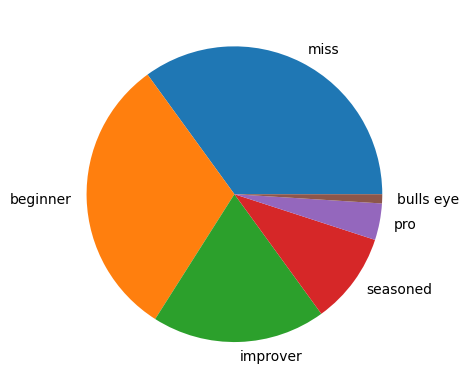

In [46]:
import numpy as np


s = abs(np.random.normal(0, 0.5, 100)) #random sample of size 100 generated from a normal distribution of mean 0 and s.d. 0.5
print(s)    
max1 = np.max(s)
min1 = np.min(s)

s1 = [(x-min1)/(max1-min1) for x in s]
print(s1)
sc = np.zeros(6)

for x in s1:
    if x < 0.2:
        sc[0] = sc[0] + 1
    elif x < 0.4:
        sc[1] = sc[1] + 1
    elif x < 0.6:
        sc[2] = sc[2] + 1
    elif x < 0.8:
        sc[3] = sc[3] + 1 
    elif x < 0.95:
        sc[4] = sc[4] + 1     
    else:
        sc[5] = sc[5] + 1
        
print(sc)        

import matplotlib.pyplot as plt
plt.pie(sc, labels = ['miss', 'beginner', 'improver', 'seasoned', 'pro', 'bulls eye']) #Note that ‘miss’ is modelled on an event with the highest probability, with x-value close to the mean (0); similarly ‘bull’s eye’ is modelled on the rare events, i.e. with low probabilities

plt.show()


### Q9.
Given the plot of land in the figure below, use the formula of Rectangular rule to approximate the area (shown in black). Do the same using both the original formulas and scipy implementations of Trapezoidal rule and Simpson’s rule. Compute the actual area (hint: area between an ellipse and a circle) and compare the approximate values for this area by printing the percentage accuracy (abs(approx-actual)/actual)*100) for all the above approximate values.

![Q9pic](Q9pic.png)

In [47]:
import numpy as np
N = 10
#circle
xs, h = np.linspace(0, 4, N, endpoint=False, retstep=True)

#print(xs)
#print(h)

ys = np.sqrt(16 - xs*xs)
#print(ys)
#Rectangular
Irect_c = h*np.sum(ys)

#ellipse
xs, h = np.linspace(0, 5, N, endpoint=False, retstep=True)

#print(xs)
#print(h)

ys = 6*np.sqrt(1 - xs*xs/25)
#print(ys)
#Rectangular
Irect_e = h*np.sum(ys)

print("Rectangular=%.5f" %(Irect_e-Irect_c))

#---------------------------------------

import scipy.integrate as spi

#Trapezoidal rule

#print("Actual=%f" %(1/11.))
#circle
xs, h = np.linspace(0, 4, N, endpoint=True, retstep=True)
ys = np.sqrt(16 - xs*xs)
#print(ys)
Itrap_c = h*(0.5*(ys[0] + ys[-1]) + np.sum(ys[1:-1]))
#print("Trapezoidal=%.5f" %(Itrap))

Itrap1_c = spi.trapz(ys, xs)
#ellipse
xs, h = np.linspace(0, 5, N, endpoint=True, retstep=True)
ys = 6*np.sqrt(1 - xs*xs/25)
#print(ys)
Itrap_e = h*(0.5*(ys[0] + ys[-1]) + np.sum(ys[1:-1]))
#print("Trapezoidal=%.5f" %(Itrap))

Itrap1_e = spi.trapz(ys, xs)

print("Trapezoidal ori=%f" %(Itrap_e - Itrap_c))
print("Trapezoidal scipy=%f" %(Itrap1_e - Itrap1_c))

from scipy.integrate import simps

#Simpson's rule
#circle
xs, h = np.linspace(0, 4, N+1, endpoint=True, retstep=True)
ys = np.sqrt(16 - xs*xs)
#print(ys)
#print(xs)

Isimp_c = (h/3.)*(ys[0] + ys[-1] + 4*np.sum(ys[1:-1:2]) + 2*np.sum(ys[2:-1:2]))
#print("Simp=%.5f" %(Isimp))

#import math

Isimp1_c = spi.simps(ys, xs)




#ellipse


xs, h = np.linspace(0, 5, N+1, endpoint=True, retstep=True)
ys = 6*np.sqrt(1 - xs*xs/25)
#print(ys)
#print(xs)

Isimp_e = (h/3.)*(ys[0] + ys[-1] + 4*np.sum(ys[1:-1:2]) + 2*np.sum(ys[2:-1:2]))
#print("Simp=%.5f" %(Isimp))
Isimp1_e = spi.simps(ys, xs)
#import math

print("Simpson ori=%f" %(Isimp_e - Isimp_c))
print("Simpson scipy=%f" %(Isimp1_e - Isimp1_c))





import math

actual = (math.pi*6*5 - math.pi*4*4)*0.25

print("Actual=%f" %(actual))


Rectangular=11.56581
Trapezoidal ori=10.843649
Trapezoidal scipy=10.843649
Simpson ori=10.944529
Simpson scipy=10.944529
Actual=10.995574


/tmp/ipykernel_82087/2654235579.py:41: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  Itrap1_c = spi.trapz(ys, xs)
/tmp/ipykernel_82087/2654235579.py:49: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  Itrap1_e = spi.trapz(ys, xs)
/tmp/ipykernel_82087/2654235579.py:68: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  Isimp1_c = spi.simps(ys, xs)
/tmp/ipykernel_82087/2654235579.py:83: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  Isimp1_e = spi.simps(ys, xs)


### Q10 Clustering
For the overall betterment of institute performance at the national level, the Football Club of IISER Kolkata has decided to apply data science to the player performance statistics. The first application is to segregate the strikers based on their goal-scoring performance and expose them to customized training. To be more specific, the strikers with similar goal-scoring performance in the similar number of matches, should be trained together.

To this end, consider a pool of n (>=10) strikers with (num_of_matches, number_of_goals_scores) for each player and apply k-means clustering algorithm (implemented in sklearn) to meaningfully cluster them. Use the elbow method to determine the best choice for k and finally plot the clusters with the chosen value of k. You should plot the data before and after clustering as well as the elbow plot.


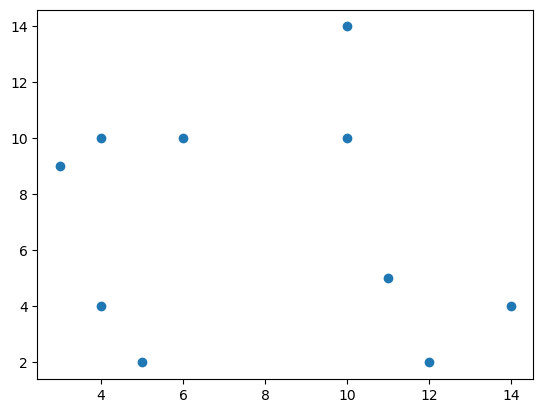

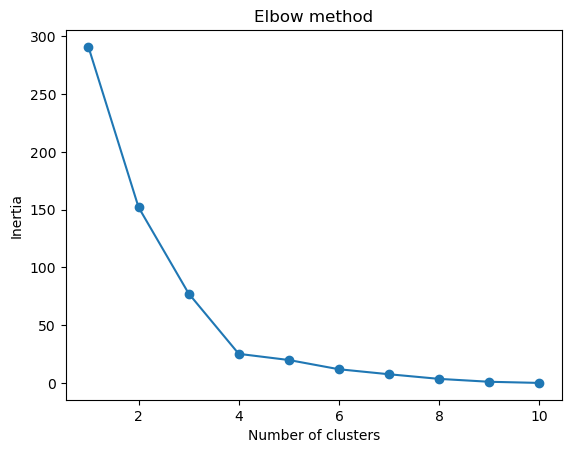

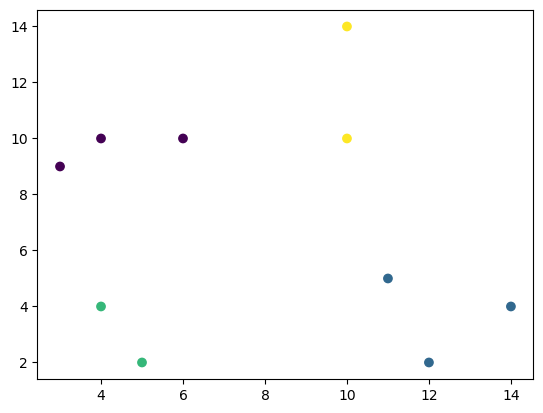

In [48]:
import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [10, 2, 14, 4, 9, 5, 4, 10, 10, 2]

plt.scatter(x, y)
plt.show()

from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()
